# Task 1 Linear Regression 

In [35]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing ML Algorithm libraries

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


<Axes: xlabel='Hours', ylabel='Scores'>

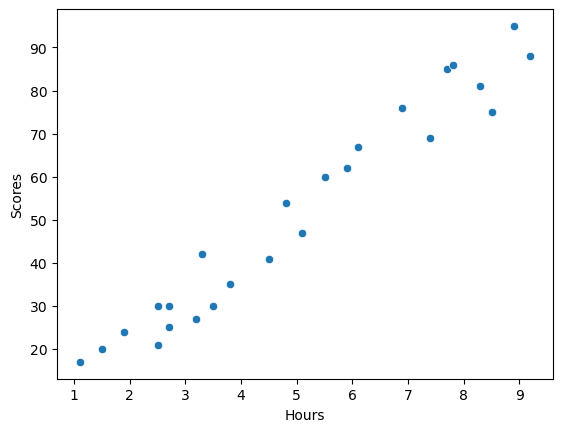

In [7]:
sns.scatterplot(x=df.Hours,y=df.Scores)

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
X=df.Hours
y=df.Scores

## Train Test Split 

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [12]:
X_train.shape

(17,)

In [13]:
X_test.shape

(8,)

In [14]:
X_train_sm=sm.add_constant(X_train)

In [15]:
X_train_sm.head()

,const,Hours
6,1.0,9.2
12,1.0,4.5
4,1.0,3.5
24,1.0,7.8
0,1.0,2.5


In [16]:
model=sm.OLS(y_train,X_train_sm)

In [17]:
lr_model=model.fit()

In [18]:
lr_model.summary()

C:\Users\91860\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.15e-11
Time:                        13:10:24   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

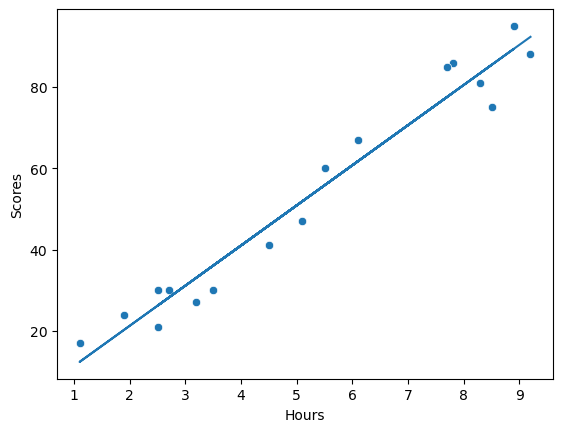

In [19]:
sns.scatterplot(x=X_train,y=y_train)
plt.plot(X_train,9.8717*X_train+(1.4951))

In [20]:
y_train_pred=lr_model.predict(X_train_sm)

In [26]:
y_train_pred.head()

6     92.314915
12    45.917857
4     36.046143
24    78.494515
0     26.174428
dtype: float64

In [22]:
x_test_sm=sm.add_constant(X_test)

In [29]:
y_test_pred=lr_model.predict(x_test_sm)

## r2 score of the model

In [30]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.9309458862687439

In [31]:
round(9.8717*9.25+(1.4951),2)

92.81

## Result: If the student studies for 9.25 hours, the student will get 92.81 score 